In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('kc_house_data.csv')
df.head(7)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


In dealing with Missing Values (NaNs), we decided to drop all three columnns with nans: 'waterfront', 'view', 'yr_renovated'. 'Waterfront': 88% (19,075) of observations were zeros & 11% (2,376) were NaNs; 'Yr_renovated': 79% (17,011) were zeros & 18% (3,842) were NaNs; finally, 'View': 90% (19,422) of observations were zeros; only 63 values missing, but we didn't think feature was varied enough to inform model in an meaningful way.  

Decided to leverage 'zipcode'; hence, dropped 'lat' and 'long'.

Dropped 'id' because it wasn't meaningful for our purposes.

Dropped 'date' because it was not meaningfully varied (all dates between 2014 & 2015).

In [111]:
df = df.drop(columns=['waterfront','view', 'yr_renovated', 'lat', 'long', 'id', 'date'], axis=1)

Addressed presence of '?' in 'sqft_basement'; changed the datatype.

In [38]:
#df['sqft_basement'] = df['sqft_basement'].replace(to_replace='?', value='0').astype(str).astype(float).astype(int)

In [40]:
df['sqft_basement'].describe()

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

Dropped 'sqft_basement' because it was a zero-inflated variable, which would be challenging to work with for very little reward.

In [112]:
df = df.drop(columns=['sqft_basement'], axis=1)

In [49]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.036056,0.667951,0.605368,0.053953,-0.053402,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.026496,0.356563,0.479386,0.155670,-0.154092,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,-0.126479,0.665838,0.686668,0.507173,-0.204786,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,-0.059445,0.762779,0.876448,0.318152,-0.199802,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,-0.008830,0.114731,0.184139,0.052946,-0.129586,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,-0.264075,0.458794,0.523989,0.489193,-0.059541,0.280102,-0.010722
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,1.000000,-0.146896,-0.158904,-0.361592,0.002888,-0.093072,-0.003126
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,-0.146896,1.000000,0.756073,0.447865,-0.185771,0.713867,0.120981
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,-0.158904,0.756073,1.000000,0.424037,-0.261570,0.731767,0.195077
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.361592,0.447865,0.424037,1.000000,-0.347210,0.326377,0.070777


Dropped 'sqft_above', 'bathrooms', 'grade', 'sqft_living15' for colinearity with 'sqft_living' [used a .75 threshhold].

In [113]:
df_dropped = df.drop(columns=['sqft_above', 'sqft_living15', 'bathrooms', 'grade'], axis=1)

In [114]:
df_dropped.corr()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,yr_built,zipcode,sqft_lot15
price,1.000000,0.308787,0.701917,0.089876,0.256804,0.036056,0.053953,-0.053402,0.082845
bedrooms,0.308787,1.000000,0.578212,0.032471,0.177944,0.026496,0.155670,-0.154092,0.030690
sqft_living,0.701917,0.578212,1.000000,0.173453,0.353953,-0.059445,0.318152,-0.199802,0.184342
sqft_lot,0.089876,0.032471,0.173453,1.000000,-0.004814,-0.008830,0.052946,-0.129586,0.718204
floors,0.256804,0.177944,0.353953,-0.004814,1.000000,-0.264075,0.489193,-0.059541,-0.010722
condition,0.036056,0.026496,-0.059445,-0.008830,-0.264075,1.000000,-0.361592,0.002888,-0.003126
yr_built,0.053953,0.155670,0.318152,0.052946,0.489193,-0.361592,1.000000,-0.347210,0.070777
zipcode,-0.053402,-0.154092,-0.199802,-0.129586,-0.059541,0.002888,-0.347210,1.000000,-0.147294
sqft_lot15,0.082845,0.030690,0.184342,0.718204,-0.010722,-0.003126,0.070777,-0.147294,1.000000


Dropped a handful of outliers for different independent variables.

In [115]:
indexNames = df_dropped[df_dropped['sqft_living'] >= 8000].index
df_dropped.drop(indexNames, inplace=True)
df_dropped.shape

(21587, 9)

In [116]:
indexNames2 = df_dropped[df_dropped['bedrooms'] >= 9].index
df_dropped.drop(indexNames2, inplace=True)
df_dropped.shape

(21576, 9)

In [117]:
indexNames3 = df_dropped[df_dropped['sqft_lot'] > 1000000].index
df_dropped.drop(indexNames3, inplace=True)
df_dropped.shape

(21572, 9)

In [118]:
indexNames4 = df_dropped[df_dropped['floors'] > 3.0].index
df_dropped.drop(indexNames4, inplace=True)
df_dropped.shape

(21565, 9)

In [119]:
indexNames5 = df_dropped[df_dropped['sqft_lot'] > 900000].index
df_dropped.drop(indexNames5, inplace=True)
df_dropped.shape

(21562, 9)

In [120]:
df_dropped.corr()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,yr_built,zipcode,sqft_lot15
price,1.000000,0.317039,0.693629,0.095361,0.261577,0.039407,0.056624,-0.052356,0.079992
bedrooms,0.317039,1.000000,0.595942,0.038001,0.182350,0.024006,0.167220,-0.160872,0.031960
sqft_living,0.693629,0.595942,1.000000,0.191165,0.355846,-0.059430,0.324974,-0.202028,0.183064
sqft_lot,0.095361,0.038001,0.191165,1.000000,-0.005386,-0.008781,0.063417,-0.140255,0.776422
floors,0.261577,0.182350,0.355846,-0.005386,1.000000,-0.264484,0.491000,-0.060556,-0.011509
condition,0.039407,0.024006,-0.059430,-0.008781,-0.264484,1.000000,-0.361636,0.002753,-0.003224
yr_built,0.056624,0.167220,0.324974,0.063417,0.491000,-0.361636,1.000000,-0.347593,0.071668
zipcode,-0.052356,-0.160872,-0.202028,-0.140255,-0.060556,0.002753,-0.347593,1.000000,-0.147876
sqft_lot15,0.079992,0.031960,0.183064,0.776422,-0.011509,-0.003224,0.071668,-0.147876,1.000000


Dropped 'sqft_lot15' because of colinearity concerns with 'sqft_lot'.

In [121]:
df_dropped.drop(columns=['sqft_lot15'], axis=1, inplace=True)

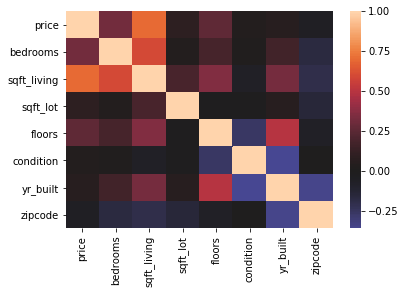

In [122]:
import seaborn as sns
sns.heatmap(df_dropped.corr(), center=0);

In [91]:
df_dropped.head(7)

,price,bedrooms,sqft_living,sqft_lot,floors,condition,yr_built,zipcode
0,221900.0,3,1180,5650,1.0,3,1955,98178
1,538000.0,3,2570,7242,2.0,3,1951,98125
2,180000.0,2,770,10000,1.0,3,1933,98028
3,604000.0,4,1960,5000,1.0,5,1965,98136
4,510000.0,3,1680,8080,1.0,3,1987,98074
5,1230000.0,4,5420,101930,1.0,3,2001,98053
6,257500.0,3,1715,6819,2.0,3,1995,98003


In [123]:
#grade_dummies = pd.get_dummies(df_dropped['grade'], prefix="gd")
zip_dummies = pd.get_dummies(df_dropped['zipcode'], prefix="zp")
year_dummies = pd.get_dummies(df_dropped['yr_built'], prefix="yr")
condition_dummies = pd.get_dummies(df_dropped['condition'], prefix="cond")

In [124]:
df_dropped = df_dropped.drop(['zipcode', 'yr_built', 'condition'], axis=1)

In [125]:
df_dropped = pd.concat([df_dropped, zip_dummies, year_dummies, condition_dummies], axis=1)
df_dropped.head()

,price,bedrooms,sqft_living,sqft_lot,floors,zp_98001,zp_98002,zp_98003,zp_98004,zp_98005,...,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,cond_1,cond_2,cond_3,cond_4,cond_5
0,221900.0,3,1180,5650,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2570,7242,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,770,10000,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,604000.0,4,1960,5000,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,1680,8080,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


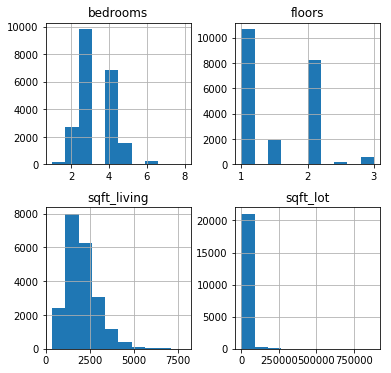

In [126]:
import matplotlib.pyplot as plt

%matplotlib inline

df_dropped[["sqft_living", "sqft_lot", "floors", "bedrooms"]].hist(figsize  = [6, 6])
plt.show()

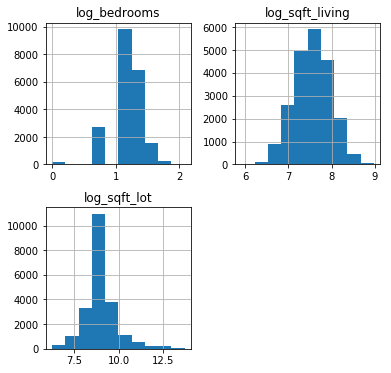

In [127]:
import numpy as np
data_log = pd.DataFrame([])
data_log["log_sqft_living"] = np.log(df_dropped["sqft_living"])
data_log["log_sqft_lot"] = np.log(df_dropped["sqft_lot"])
#data_log["log_floors"] = np.log(df_dropped['floors'])
data_log["log_bedrooms"] = np.log(df_dropped["bedrooms"])
data_log.hist(figsize  = [6, 6]);

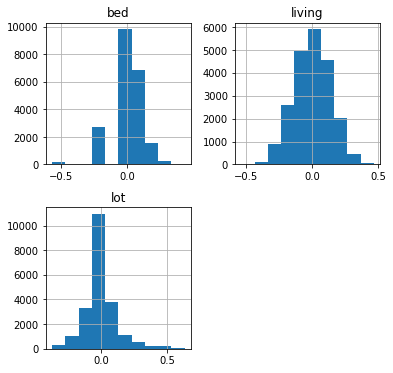

In [128]:
logbed = data_log["log_bedrooms"]
logsqftliving = data_log["log_sqft_living"]
logsqftlot = data_log["log_sqft_lot"]
#logfloors = data_log["log_floors"]

scaled_bed = (logbed-np.mean(logbed))/(max(logbed)-min(logbed))
scaled_sqft_living = (logsqftliving-np.mean(logsqftliving))/(max(logsqftliving)-min(logsqftliving))
scaled_sqft_lot = (logsqftlot-np.mean(logsqftlot))/(max(logsqftlot)-min(logsqftlot))
#scaled_floors = (logfloors-np.mean(logfloors))/(max(logfloors)-min(logfloors))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled["bed"]= scaled_bed
data_cont_scaled["living"]= scaled_sqft_living
data_cont_scaled["lot"] = scaled_sqft_lot
#data_cont_scaled["floors"] = scaled_floors

data_cont_scaled.hist(figsize  = [6, 6]);

In [129]:
df_dropped['bedrooms'] = data_cont_scaled["bed"]
df_dropped['sqft_living'] = data_cont_scaled["living"]
df_dropped['sqft_lot'] = data_cont_scaled["lot"]
#df_dropped['floors'] = data_cont_scaled["floors"]

In [130]:
df_dropped.head(7)

,price,bedrooms,sqft_living,sqft_lot,floors,zp_98001,zp_98002,zp_98003,zp_98004,zp_98005,...,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,cond_1,cond_2,cond_3,cond_4,cond_5
0,221900.0,-0.037705,-0.155736,-0.046897,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,-0.037705,0.098759,-0.013512,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,-0.232693,-0.295303,0.029885,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,604000.0,0.100640,0.010168,-0.063334,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,-0.037705,-0.040231,0.001213,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,1230000.0,0.100640,0.342725,0.342121,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,257500.0,-0.037705,-0.033490,-0.021606,2.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [261]:
#import pandas as pd
#from sklearn import preprocessing

#float_array = df_dropped['sqft_living'].values.astype(float)
#min_max_scaler = preprocessing.MinMaxScaler()
#np_scaled = min_max_scaler.fit_transform(float_array)
#df_normalized = pd.DataFrame(np_scaled)
#df_normalized.head()

In [131]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [11]:
#formula = "price ~ sqft_living+floors+bedrooms+sqft_living15"
#model = ols(formula= formula, data=df_dropped).fit()

In [132]:
outcome = 'price'
predictors = df_dropped.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [133]:
model = ols(formula= formula, data=df_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     252.2
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:48:15   Log-Likelihood:            -2.9319e+05
No. Observations:               21562   AIC:                         5.868e+05
Df Residuals:                   21369   BIC:                         5.883e+05
Df Model:                         192                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.164e+05   8045.226     51.757      0.000    4.01e+05    4.32e+05
bedrooms    -2.508e+05   1.36e+04    -18.417      0.000   -2.78e+05   -2.24e+05
sqft_living   1.38e+06   1.62e+04     84.942      0.000    1.35e+06    1.41e+06
sqft_lot     5.287e+05   1.72e+04     30.711      0.000    4.95e+05    5.62e+05
floors       2.135e+04   3780.983      5.648      0.000    1.39e+04    2.88e+04
zp_98001    -2.491e+05   1.04e+04    -24.026      0.000   -2.69e+05   -2.29e+05
zp_98002     -2.05e+05   1.39e+04    -14.767      0.000   -2.32e+05   -1.78e+05
zp_98003    -2.116e+05   1.17e+04    -18.017      0.000   -2.35e+05   -1.89e+05
zp_98004     6.416e+05   1.12e+04     57.279      0.000     6.2e+05    6.64e+05
zp_98005     1.458e+05   1.52e+04      9.618      0.000    1.16e+05    1.76e+05
zp_98006     1.648e+05   9007.831     18.295      0.000    1.47e+05    1.82e+05
zp_98007     7.622e+04   1.65e+04      4.617      0.000    4.39e+04    1.09e+05
zp_98008     1.267e+05   1.19e+04     10.668      0.000    1.03e+05     1.5e+05
zp_98010    -2.148e+05   1.96e+04    -10.931      0.000   -2.53e+05   -1.76e+05
zp_98011    -9.669e+04    1.4e+04     -6.918      0.000   -1.24e+05   -6.93e+04
zp_98014    -1.948e+05   1.79e+04    -10.869      0.000    -2.3e+05    -1.6e+05
zp_98019    -2.055e+05   1.43e+04    -14.360      0.000   -2.34e+05   -1.77e+05
zp_98022    -2.636e+05   1.31e+04    -20.165      0.000   -2.89e+05   -2.38e+05
zp_98023    -2.245e+05   8968.296    -25.033      0.000   -2.42e+05   -2.07e+05
zp_98024    -1.208e+05    2.2e+04     -5.487      0.000   -1.64e+05   -7.76e+04
zp_98027    -4.229e+04   9777.968     -4.325      0.000   -6.15e+04   -2.31e+04
zp_98028    -1.004e+05   1.16e+04     -8.634      0.000   -1.23e+05   -7.76e+04
zp_98029     2.398e+04   1.12e+04      2.147      0.032    2089.573    4.59e+04
zp_98030    -2.393e+05   1.23e+04    -19.504      0.000   -2.63e+05   -2.15e+05
zp_98031    -2.179e+05   1.19e+04    -18.265      0.000   -2.41e+05   -1.95e+05
zp_98032    -1.967e+05   1.75e+04    -11.264      0.000   -2.31e+05   -1.62e+05
zp_98033     1.951e+05   9471.845     20.599      0.000    1.77e+05    2.14e+05
zp_98034     1.858e+04   8666.712      2.144      0.032    1595.410    3.56e+04
zp_98038     -2.34e+05   8397.611    -27.866      0.000    -2.5e+05   -2.18e+05
zp_98039     1.186e+06    2.8e+04     42.326      0.000    1.13e+06    1.24e+06
zp_98040     4.544e+05   1.18e+04     38.353      0.000    4.31e+05    4.78e+05
zp_98042    -2.343e+05   8633.747    -27.143      0.000   -2.51e+05   -2.17e+05
zp_98045    -1.634e+05   1.34e+04    -12.164      0.000    -1.9e+05   -1.37e+05
zp_98052     4.006e+04   8358.866      4.793      0.000    2.37e+04    5.64e+04
zp_98053    -3.966e+04   1.02e+04     -3.902      0.000   -5.96e+04   -1.97e+04
zp_98055    -1.713e+05   1.19e+04    -14.34

In [134]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_dropped, test_size=0.20)

In [861]:
len(train)

17242

In [862]:
len(test)

4311

In [135]:
outcome = 'price'
predictors = train.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [136]:
model = ols(formula= formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     199.4
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:48:28   Log-Likelihood:            -2.3465e+05
No. Observations:               17249   AIC:                         4.697e+05
Df Residuals:                   17056   BIC:                         4.712e+05
Df Model:                         192                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.215e+05   9023.211     46.714      0.000    4.04e+05    4.39e+05
bedrooms    -2.517e+05   1.54e+04    -16.310      0.000   -2.82e+05   -2.21e+05
sqft_living  1.386e+06   1.84e+04     75.361      0.000    1.35e+06    1.42e+06
sqft_lot     5.324e+05   1.96e+04     27.172      0.000    4.94e+05    5.71e+05
floors       1.892e+04   4267.592      4.432      0.000    1.06e+04    2.73e+04
zp_98001    -2.511e+05   1.15e+04    -21.748      0.000   -2.74e+05   -2.28e+05
zp_98002    -2.048e+05   1.54e+04    -13.277      0.000   -2.35e+05   -1.75e+05
zp_98003    -2.077e+05   1.35e+04    -15.354      0.000   -2.34e+05   -1.81e+05
zp_98004       6.3e+05   1.26e+04     50.149      0.000    6.05e+05    6.55e+05
zp_98005     1.399e+05   1.75e+04      7.996      0.000    1.06e+05    1.74e+05
zp_98006      1.55e+05   1.02e+04     15.235      0.000    1.35e+05    1.75e+05
zp_98007     7.448e+04   1.93e+04      3.869      0.000    3.67e+04    1.12e+05
zp_98008     1.365e+05   1.35e+04     10.079      0.000     1.1e+05    1.63e+05
zp_98010    -2.214e+05   2.15e+04    -10.276      0.000   -2.64e+05   -1.79e+05
zp_98011    -9.752e+04   1.56e+04     -6.253      0.000   -1.28e+05   -6.69e+04
zp_98014    -2.149e+05    2.1e+04    -10.232      0.000   -2.56e+05   -1.74e+05
zp_98019    -2.079e+05   1.61e+04    -12.895      0.000   -2.39e+05   -1.76e+05
zp_98022    -2.606e+05   1.47e+04    -17.700      0.000   -2.89e+05   -2.32e+05
zp_98023    -2.235e+05   1.01e+04    -22.039      0.000   -2.43e+05   -2.04e+05
zp_98024    -1.152e+05   2.42e+04     -4.751      0.000   -1.63e+05   -6.77e+04
zp_98027    -4.232e+04   1.12e+04     -3.779      0.000   -6.43e+04   -2.04e+04
zp_98028     -9.73e+04   1.32e+04     -7.355      0.000   -1.23e+05   -7.14e+04
zp_98029     1.983e+04   1.26e+04      1.579      0.114   -4793.212    4.45e+04
zp_98030     -2.38e+05    1.4e+04    -17.002      0.000   -2.65e+05   -2.11e+05
zp_98031    -2.141e+05   1.33e+04    -16.159      0.000    -2.4e+05   -1.88e+05
zp_98032    -1.916e+05   2.01e+04     -9.545      0.000   -2.31e+05   -1.52e+05
zp_98033     2.015e+05    1.1e+04     18.310      0.000     1.8e+05    2.23e+05
zp_98034     2.226e+04   9767.381      2.279      0.023    3114.349    4.14e+04
zp_98038    -2.355e+05   9479.915    -24.839      0.000   -2.54e+05   -2.17e+05
zp_98039     1.165e+06   3.13e+04     37.204      0.000     1.1e+06    1.23e+06
zp_98040     4.653e+05   1.33e+04     34.868      0.000    4.39e+05    4.91e+05
zp_98042    -2.333e+05   9807.753    -23.783      0.000   -2.52e+05   -2.14e+05
zp_98045    -1.579e+05   1.49e+04    -10.598      0.000   -1.87e+05   -1.29e+05
zp_98052     4.434e+04   9385.331      4.725      0.000    2.59e+04    6.27e+04
zp_98053    -3.961e+04   1.16e+04     -3.407      0.001   -6.24e+04   -1.68e+04
zp_98055     -1.72e+05   1.33e+04    -12.88

In [137]:
outcome = 'price'
predictors = test.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [138]:
model = ols(formula= formula, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     54.70
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:48:39   Log-Likelihood:                -58413.
No. Observations:                4313   AIC:                         1.172e+05
Df Residuals:                    4120   BIC:                         1.184e+05
Df Model:                         192                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.103e+05   1.84e+04     22.308      0.000    3.74e+05    4.46e+05
bedrooms    -2.568e+05   2.94e+04     -8.736      0.000   -3.14e+05   -1.99e+05
sqft_living  1.352e+06   3.52e+04     38.437      0.000    1.28e+06    1.42e+06
sqft_lot     5.095e+05   3.65e+04     13.965      0.000    4.38e+05    5.81e+05
floors       2.908e+04   8261.040      3.520      0.000    1.29e+04    4.53e+04
zp_98001    -2.387e+05   2.37e+04    -10.054      0.000   -2.85e+05   -1.92e+05
zp_98002    -1.918e+05   3.23e+04     -5.943      0.000   -2.55e+05   -1.29e+05
zp_98003    -2.244e+05   2.37e+04     -9.461      0.000   -2.71e+05   -1.78e+05
zp_98004     6.882e+05   2.49e+04     27.623      0.000    6.39e+05    7.37e+05
zp_98005     1.567e+05   3.02e+04      5.180      0.000    9.74e+04    2.16e+05
zp_98006     2.052e+05   1.95e+04     10.544      0.000    1.67e+05    2.43e+05
zp_98007     8.078e+04   3.22e+04      2.509      0.012    1.77e+04    1.44e+05
zp_98008      8.73e+04   2.47e+04      3.535      0.000    3.89e+04    1.36e+05
zp_98010    -1.851e+05   4.89e+04     -3.787      0.000   -2.81e+05   -8.93e+04
zp_98011    -9.107e+04   3.17e+04     -2.874      0.004   -1.53e+05   -2.89e+04
zp_98014    -1.365e+05   3.45e+04     -3.961      0.000   -2.04e+05   -6.89e+04
zp_98019    -1.918e+05   3.12e+04     -6.144      0.000   -2.53e+05   -1.31e+05
zp_98022    -2.778e+05   2.88e+04     -9.641      0.000   -3.34e+05   -2.21e+05
zp_98023    -2.255e+05   1.93e+04    -11.697      0.000   -2.63e+05   -1.88e+05
zp_98024    -1.393e+05   5.38e+04     -2.590      0.010   -2.45e+05   -3.39e+04
zp_98027    -4.477e+04   2.02e+04     -2.221      0.026   -8.43e+04   -5245.201
zp_98028    -1.194e+05   2.44e+04     -4.900      0.000   -1.67e+05   -7.16e+04
zp_98029     3.995e+04   2.44e+04      1.639      0.101   -7841.458    8.77e+04
zp_98030    -2.417e+05   2.56e+04     -9.456      0.000   -2.92e+05   -1.92e+05
zp_98031    -2.301e+05   2.77e+04     -8.310      0.000   -2.84e+05   -1.76e+05
zp_98032    -2.068e+05   3.54e+04     -5.844      0.000   -2.76e+05   -1.37e+05
zp_98033     1.759e+05   1.86e+04      9.457      0.000    1.39e+05    2.12e+05
zp_98034    -2376.9899    1.9e+04     -0.125      0.900   -3.95e+04    3.48e+04
zp_98038    -2.263e+05   1.82e+04    -12.454      0.000   -2.62e+05   -1.91e+05
zp_98039     1.273e+06   6.33e+04     20.092      0.000    1.15e+06     1.4e+06
zp_98040     4.082e+05   2.58e+04     15.790      0.000    3.57e+05    4.59e+05
zp_98042    -2.374e+05   1.82e+04    -13.011      0.000   -2.73e+05   -2.02e+05
zp_98045    -1.826e+05   3.16e+04     -5.779      0.000   -2.45e+05   -1.21e+05
zp_98052     2.426e+04   1.85e+04      1.312      0.190    -1.2e+04    6.05e+04
zp_98053    -3.902e+04   2.09e+04     -1.866      0.062      -8e+04    1983.133
zp_98055    -1.643e+05    2.7e+04     -6.09